Se va a relizar un (resampleo y desagregacion) de la imagen raster de Land Cover 100 m a 30 m, para posteriormente realizar una observacion de la cantidad de perdida  aumento de cada una de las coberturas. Cabe aclarar que hacer el () generara una propagacion del error por la medida. En este ejemplo se va hacer con una imagen de Corine Land Cover del 2019.

In [46]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [48]:
import landlab
print("Landlab está instalado correctamente.")

Landlab está instalado correctamente.


In [50]:
import rasterio
import rasterio.plot
import rasterio.warp
import rasterio.mask

ModuleNotFoundError: No module named 'rasterio'

In [52]:
import topojson as tp

ModuleNotFoundError: No module named 'topojson'

In [54]:
import shapely

In [56]:
import geopandas as gdp

ModuleNotFoundError: No module named 'geopandas'

In [58]:
from landlab.components import ChannelProfiler

In [60]:
m_root=r"C:/Users/ximen/Desktop/Archivos/"
m_root2=r"C:/Users/ximen/Desktop/Archivos/"

In [62]:
clc = rasterio.open(m_root+'proyecto/LC_2019_100.tif')
clc_elev = rasterio.open(m_root+'proyecto/LC_2019_100.tif')

NameError: name 'rasterio' is not defined

In [129]:
clc_dem = rasterio.open(m_root2+'DEM/col_12m')

In [ ]:
# Open raster image 
rasterObj = rasterio.open("C:/Users/ximen/Desktop/UNAL/PRIMER SEMESTRE/SIG/PROYECTO/DEM/col_12m")

show(rasterObj)

In [18]:
clc.read(1).shape

(1193, 1476)

In [23]:
clc.transform

Affine(100.0, 0.0, -8265850.0,
       0.0, -100.0, 553200.0)

In [38]:
clc.crs

CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]')

In [34]:
clc.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1476,
 'height': 1193,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(100.0, 0.0, -8265850.0,
        0.0, -100.0, 553200.0)}

In [ ]:
factor = 5
r = clc.read(1,
    out_shape=(
        int(clc.height * factor),
        int(clc.width * factor)
        ),
    resampling=rasterio.enums.Resampling.bilinear
)

In [ ]:
r.shape

In [ ]:
new_transform = clc.transform * clc.transform.scale(
    (src.width / r.shape[1]),
    (src.height / r.shape[0])
)
new_transform

In [ ]:
rasterio.plot.show(clc);
rasterio.plot.show(r, transform=new_transform);

In [ ]:
dst_clc = clc.meta.copy()
dst_clc.update({
    'transform': new_transform,
    'width': r.shape[1],
    'height': r.shape[0],
})
dst_clc

In [ ]:
LandCo30 = rasterio.open(m_root+'proyecto/LC_2019_100.tif', 'w', **dst_kwargs)
LandCo30.write(r, 1)
LandCo30.close()

In [ ]:
rasterio.plot.show(clc.read(1)[:5, :5], transform=clc.transform);
rasterio.plot.show(r2[:25, :25], transform=new_transform2);

NameError: name 'zion_points' is not defined

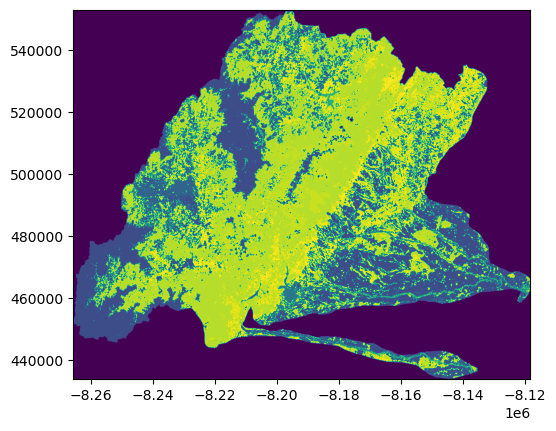

In [44]:
fig, ax = plt.subplots()
rasterio.plot.show(clc, ax=ax)
zion_points.plot(ax=ax, color='black', edgecolor='white');

Se quiere hacer una transformacion de Raster a puntos. 
Para transformar un ráster en puntos, podemos usar la función rasterio.transform.xy. Como sugiere el nombre, la función acepta índices de filas y columnas y los transforma en coordenadas xey (usando la matriz de transformación del ráster). Por ejemplo, las coordenadas del píxel superior izquierdo se pueden calcular pasando los índices (fila, col) de (0,0)

Raster to points

In [48]:
clc = rasterio.open(m_root+'proyecto/LC_2019_100.tif')
rasterio.transform.xy(clc.transform, 0, 0)

(-8265800.0, 553150.0)

In [50]:
height = clc.shape[0]
width = clc.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))

In [52]:
rows

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ...,
       [1190, 1190, 1190, ..., 1190, 1190, 1190],
       [1191, 1191, 1191, ..., 1191, 1191, 1191],
       [1192, 1192, 1192, ..., 1192, 1192, 1192]])

In [54]:
cols

array([[   0,    1,    2, ..., 1473, 1474, 1475],
       [   0,    1,    2, ..., 1473, 1474, 1475],
       [   0,    1,    2, ..., 1473, 1474, 1475],
       ...,
       [   0,    1,    2, ..., 1473, 1474, 1475],
       [   0,    1,    2, ..., 1473, 1474, 1475],
       [   0,    1,    2, ..., 1473, 1474, 1475]])

Normalmente queremos trabajar con los puntos en forma de GeoDataFrame que también contiene los valores de los atributos como atributos de puntos. Para llegar allí, podemos transformar las coordenadas y cualquier atributo en matrices unidimensionales.

In [60]:
x, y = rasterio.transform.xy(clc.transform, rows, cols)

In [62]:
x

array([-8265800., -8265700., -8265600., ..., -8118500., -8118400.,
       -8118300.])

In [64]:
y

array([553150., 553150., 553150., ..., 433950., 433950., 433950.])

In [76]:
import geopandas as gdp

In [78]:
x = np.array(x).flatten()
y = np.array(y).flatten()
z = clc.read(1).flatten()
geom = gdp.points_from_xy(x, y, crs=clc.crs)
pnt = gdp.GeoDataFrame(data={'value':z}, geometry=geom)
pnt

,value,geometry
0,0,POINT (-8265800 553150)
1,0,POINT (-8265700 553150)
2,0,POINT (-8265600 553150)
3,0,POINT (-8265500 553150)
4,0,POINT (-8265400 553150)
...,...,...
1760863,0,POINT (-8118700 433950)
1760864,0,POINT (-8118600 433950)
1760865,0,POINT (-8118500 433950)
1760866,0,POINT (-8118400 433950)


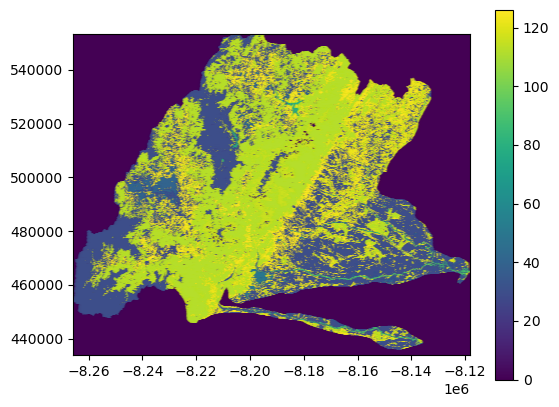

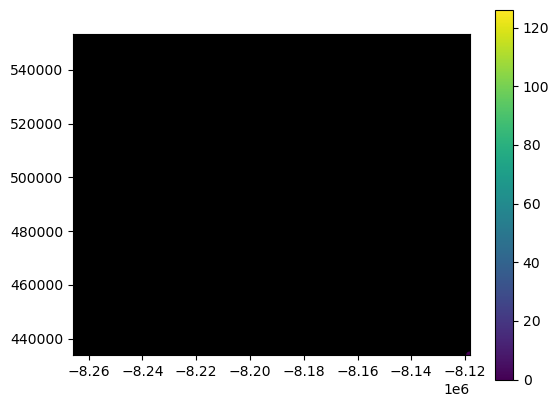

In [90]:
# Input raster
fig, ax = plt.subplots()
pnt.plot(column='value', legend=True, ax=ax)
rasterio.plot.show(clc_elev, ax=ax);
# Points
fig, ax = plt.subplots()
pnt.plot(column='value', legend=True, edgecolor='black', ax=ax)
rasterio.plot.show(clc_elev, alpha=0, ax=ax);

Para convertir y mirar las elevacion utilizamos (Curvas de nivel): Raster a contornos
la creación de curvas de nivel, que representan líneas de altura o temperatura continua (isotermas), por ejemplo. Usaremos un modelo de elevación digital (DEM) del mundo real porque el ráster artificial un raster de elevacion.tif.

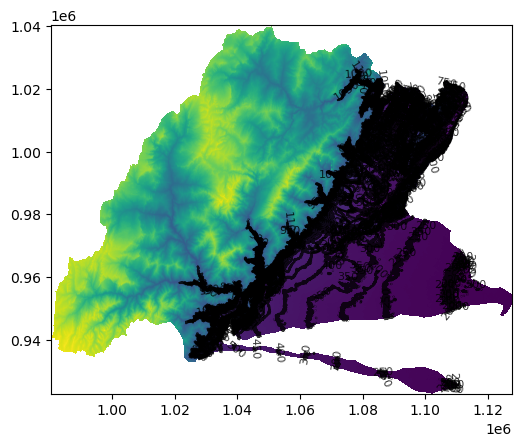

In [133]:
fig, ax = plt.subplots()
rasterio.plot.show(clc_dem, ax=ax)
rasterio.plot.show(
    clc_dem, 
    ax=ax, 
    contour=True, 
    levels=np.arange(0,1200,50), 
    colors='black'
);

In [ ]:
Con la imagen resampleada y desagregada vamos a sacar el indice de NDVI

In [ ]:
elev = clc_elev.read(1)
print(elev)
elevsum=elev+elev
elevsum

In [ ]:
np.random.seed(1)
mask = np.random.choice([True, False], src_elev.shape)
mask

In [ ]:
masked_elev=elev.copy()
masked_elev=masked_elev.astype("float64")
masked_elev[mask]=np.nan

In [ ]:
masked_elev


In [ ]:
rasterio.plot.show(elev);
rasterio.plot.show(mask);
rasterio.plot.show(masked_elev);

In [ ]:
elev_2masked=elev.copy()
elev_2masked=elev_2masked.astype("float")
elev_2masked[elev_2masked<20]=np.nan

In [ ]:
elev_2masked

In [ ]:
elev


In [ ]:
elev3_masked=elev.copy()
elev3_masked[(elev3_masked>1)&(elev3_masked<=10)]=1
elev3_masked[(elev3_masked>10)&(elev3_masked<=20)]=2
elev3_masked[(elev3_masked>20)&(elev3_masked<=30)]=3
elev3_masked[elev3_masked>30]=4
rasterio.plot.show(elev3_masked);
elev3_masked

In [ ]:
rasterio.plot.show(elev, cmap='Oranges');
rasterio.plot.show(elev3_masked, cmap='Oranges');

In [ ]:
print(src_multi_rast.descriptions)
landsat=src_multi_rast.read()
red=landsat[2]
nir=landsat[3]
ndvi=(nir-red)/(nir+red)
ndvi
rasterio.plot.show(ndvi, cmap='Oranges');

In [ ]:
rasterio.plot.show(landsat_rgb, cmap='RdYlGn');

In [ ]:
# Input DEM
clc_srtm = rasterio.open(path_in)
clcm = src_srtm.read(1).astype(float)
srtm[srtm == src_srtm.nodata] = np.nan
fig, ax = plt.subplots()
rasterio.plot.show(clc_srtm, cmap='Spectral_r', ax=ax)
fig.colorbar(ax.imshow(clc, cmap='Spectral_r'), ax=ax);